In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

from datetime import datetime

import networkx as nx


import statsmodels.api as sm


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns




from sklearn import datasets
from sklearn import linear_model

from sklearn.model_selection import GridSearchCV

from sklearn import metrics


In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df_el = pd.read_pickle('./df.pkl')

fraud = pd.read_pickle('./fraud.pkl')

nfraud = pd.read_pickle('./fraud.pkl')

In [4]:
data = pd.read_csv('../../../processed_data/provider_final.csv')

In [5]:
df = data.copy()

In [6]:
df.columns

Index(['Unnamed: 0', 'Provider', 'PotentialFraud', 'DurationMedianIP',
       'DurationMeanIP', 'DurationMedianOP', 'DurationMeanOP', 'Serves',
       'ChronCondsMedian', 'ChronCondsMean', 'ChronConsMode', 'PtAgeMedian',
       'PtAgeMean', 'NumPtsIP', 'NumPtsOP', 'NumStatesIP', 'NumStatesOP',
       'SharePhysician', 'MergeAvgClaimReimbursed', 'NumTopCodeClaim',
       'DupClaimNum_IP', 'DupClaimRatio_IP', 'DupClaim_IP',
       'DupClaimStatesNum_IP', 'DupClaimMultiState_IP',
       'DupClaimProviderNum_IP', 'DupClaimMultiProvider_IP',
       'DupClaimStartDtNum_IP', 'DupClaimMultiStartDt_IP', 'DupClaimNum_OP',
       'DupClaimRatio_OP', 'DupClaim_OP', 'DupClaimStatesNum_OP',
       'DupClaimMultiState_OP', 'DupClaimProviderNum_OP',
       'DupClaimMultiProvider_OP', 'DupClaimStartDtNum_OP',
       'DupClaimMultiStartDt_OP', 'AvgDuration', 'NumOfPt', 'NumOfClm',
       'ClmPerPt', 'TotalRev', 'RevPerPt', 'ClmNoPhy', 'ClmAllPhy',
       'ClmNoProc', 'ClmPerDt'],
      dtype='object')

In [7]:
#df['ClmPerDt'].value_counts(normalize = True) * 100

In [8]:
df.head()

,Unnamed: 0,Provider,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,Serves,ChronCondsMedian,ChronCondsMean,...,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt
0,0,PRV51001,No,4.0,5.000000,0.0,0.550000,Both,6.0,5.760000,...,1.44,24,25,1.04,109980,4582.50,0,2,23,1.09
1,1,PRV51003,Yes,4.0,5.161290,0.0,2.357143,Both,7.0,6.674242,...,3.67,117,132,1.13,671956,5743.21,0,4,93,1.19
2,2,PRV51004,No,0.0,0.000000,0.0,1.429530,OP,7.0,6.812081,...,1.43,138,149,1.08,52480,380.29,0,12,149,1.27
3,3,PRV51005,Yes,0.0,0.000000,0.0,1.088412,OP,7.0,6.886695,...,1.09,495,1165,2.35,284610,574.97,2,98,1165,3.27
4,4,PRV51007,No,5.0,5.333333,0.0,0.768116,Both,7.0,6.986111,...,0.96,58,72,1.24,36974,637.48,0,8,71,1.06


In [9]:
df = df.replace({'No': 0, 'Yes': 1})

In [10]:
data['Serves'].unique()

array(['Both', 'OP', 'IP'], dtype=object)

In [11]:
df = pd.get_dummies(df, columns = ['Serves'])

In [12]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [13]:
df.head()

,Provider,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,...,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt,Serves_Both,Serves_IP,Serves_OP
0,PRV51001,0,4.0,5.000000,0.0,0.550000,6.0,5.760000,5.0,79.0,...,1.04,109980,4582.50,0,2,23,1.09,1,0,0
1,PRV51003,1,4.0,5.161290,0.0,2.357143,7.0,6.674242,6.0,71.0,...,1.13,671956,5743.21,0,4,93,1.19,1,0,0
2,PRV51004,0,0.0,0.000000,0.0,1.429530,7.0,6.812081,8.0,72.0,...,1.08,52480,380.29,0,12,149,1.27,0,0,1
3,PRV51005,1,0.0,0.000000,0.0,1.088412,7.0,6.886695,5.0,70.0,...,2.35,284610,574.97,2,98,1165,3.27,0,0,1
4,PRV51007,0,5.0,5.333333,0.0,0.768116,7.0,6.986111,6.0,69.5,...,1.24,36974,637.48,0,8,71,1.06,1,0,0


In [14]:
data.isnull().sum().sort_values(ascending = False)

ClmPerDt                    0
ClmNoProc                   0
DupClaimRatio_IP            0
DupClaimNum_IP              0
NumTopCodeClaim             0
MergeAvgClaimReimbursed     0
SharePhysician              0
NumStatesOP                 0
NumStatesIP                 0
NumPtsOP                    0
NumPtsIP                    0
PtAgeMean                   0
PtAgeMedian                 0
ChronConsMode               0
ChronCondsMean              0
ChronCondsMedian            0
Serves                      0
DurationMeanOP              0
DurationMedianOP            0
DurationMeanIP              0
DurationMedianIP            0
PotentialFraud              0
Provider                    0
DupClaim_IP                 0
DupClaimStatesNum_IP        0
DupClaimMultiState_IP       0
DupClaimStartDtNum_OP       0
ClmAllPhy                   0
ClmNoPhy                    0
RevPerPt                    0
TotalRev                    0
ClmPerPt                    0
NumOfClm                    0
NumOfPt   

In [15]:
X = df.drop(['Provider', 'PotentialFraud'], axis = 1)

In [16]:
df_el = df_el.replace({'No': 0, 'Yes': 1})

In [17]:
X_el = df_el.drop(['Provider', 'PotentialFraud'], axis = 1)

In [18]:
X.head()

,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,...,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt,Serves_Both,Serves_IP,Serves_OP
0,4.0,5.000000,0.0,0.550000,6.0,5.760000,5.0,79.0,77.880000,5.0,...,1.04,109980,4582.50,0,2,23,1.09,1,0,0
1,4.0,5.161290,0.0,2.357143,7.0,6.674242,6.0,71.0,69.083333,53.0,...,1.13,671956,5743.21,0,4,93,1.19,1,0,0
2,0.0,0.000000,0.0,1.429530,7.0,6.812081,8.0,72.0,71.261745,0.0,...,1.08,52480,380.29,0,12,149,1.27,0,0,1
3,0.0,0.000000,0.0,1.088412,7.0,6.886695,5.0,70.0,69.526180,0.0,...,2.35,284610,574.97,2,98,1165,3.27,0,0,1
4,5.0,5.333333,0.0,0.768116,7.0,6.986111,6.0,69.5,68.305556,3.0,...,1.24,36974,637.48,0,8,71,1.06,1,0,0


In [19]:
X.shape

(5410, 47)

In [20]:
X.head()

,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,...,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt,Serves_Both,Serves_IP,Serves_OP
0,4.0,5.000000,0.0,0.550000,6.0,5.760000,5.0,79.0,77.880000,5.0,...,1.04,109980,4582.50,0,2,23,1.09,1,0,0
1,4.0,5.161290,0.0,2.357143,7.0,6.674242,6.0,71.0,69.083333,53.0,...,1.13,671956,5743.21,0,4,93,1.19,1,0,0
2,0.0,0.000000,0.0,1.429530,7.0,6.812081,8.0,72.0,71.261745,0.0,...,1.08,52480,380.29,0,12,149,1.27,0,0,1
3,0.0,0.000000,0.0,1.088412,7.0,6.886695,5.0,70.0,69.526180,0.0,...,2.35,284610,574.97,2,98,1165,3.27,0,0,1
4,5.0,5.333333,0.0,0.768116,7.0,6.986111,6.0,69.5,68.305556,3.0,...,1.24,36974,637.48,0,8,71,1.06,1,0,0


In [21]:
X.dtypes

DurationMedianIP            float64
DurationMeanIP              float64
DurationMedianOP            float64
DurationMeanOP              float64
ChronCondsMedian            float64
ChronCondsMean              float64
ChronConsMode               float64
PtAgeMedian                 float64
PtAgeMean                   float64
NumPtsIP                    float64
NumPtsOP                    float64
NumStatesIP                 float64
NumStatesOP                 float64
SharePhysician              float64
MergeAvgClaimReimbursed     float64
NumTopCodeClaim             float64
DupClaimNum_IP              float64
DupClaimRatio_IP            float64
DupClaim_IP                  object
DupClaimStatesNum_IP        float64
DupClaimMultiState_IP        object
DupClaimProviderNum_IP      float64
DupClaimMultiProvider_IP     object
DupClaimStartDtNum_IP       float64
DupClaimMultiStartDt_IP      object
DupClaimNum_OP              float64
DupClaimRatio_OP            float64
DupClaim_OP                 

In [22]:
X['DupClaimMultiStartDt_OP'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
X['DupClaimMultiState_OP'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
X['DupClaimNum_IP'].unique()

array([ 0.,  1.,  3.,  2.,  7., 10.,  9.,  4.,  6., 11.,  5.,  8., 22.,
       13., 15., 19.])

In [25]:
X['DupClaimNum_IP'].unique()

array([ 0.,  1.,  3.,  2.,  7., 10.,  9.,  4.,  6., 11.,  5.,  8., 22.,
       13., 15., 19.])

In [26]:
X['DupClaimMultiProvider_IP'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
#X['DupClaimNum_OP'].unique()

In [28]:
X['DupClaim_OP'].unique()

array(['yes', 'no'], dtype=object)

In [29]:
X['DupClaimMultiState_OP'].unique()

array(['yes', 'no'], dtype=object)

In [30]:
X['DupClaimMultiProvider_OP'].unique()

array(['yes', 'no'], dtype=object)

In [31]:
X['DupClaimMultiStartDt_OP'].unique()

array(['yes', 'no'], dtype=object)

In [32]:
X = pd.get_dummies(X)

In [33]:
X_el.head()

,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt
0,3.67,117,132,1.13,671956,5743.21,0,4,93,1.19
1,1.09,495,1165,2.35,284610,574.97,2,98,1165,3.27
2,2.00,208,257,1.24,380322,1828.47,1,17,240,1.46
3,1.53,206,454,2.20,367754,1785.21,3,37,445,1.66
4,2.28,37,46,1.24,33146,895.84,0,3,45,1.10


In [34]:
y = df['PotentialFraud']

In [35]:
y_el = df_el['PotentialFraud']

##  Linear Regression

In [36]:
from sklearn.linear_model import LogisticRegression

from sklearn.utils.class_weight import compute_class_weight

In [37]:
weighting = compute_class_weight('balanced', [0,1], y)

In [38]:
print('The weight for no fraud is', weighting[0].round(2))
print('The weight for potential fraud is', weighting[1].round(2))

The weight for no fraud is 0.55
The weight for potential fraud is 5.35


In [39]:
weights = {0:0.55, 1:5.35}

In [40]:
lgt = LogisticRegression(\
                         #l1_ratio = 1,
                        penalty = 'l1',
                         max_iter = 1000,
                         solver = 'liblinear', \
                         class_weight = weights)
                         #class_weight = "balanced")

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,\
                        random_state = 0)

In [42]:
grid = {"C": np.logspace(-4, 4, 20), "penalty": ["l1","l2"]}

In [43]:
lgt_cv = GridSearchCV(lgt, grid, cv = 10)

In [44]:
lgt_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0,
                                          class_weight={0: 0.55, 1: 5.35},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1...3,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989

In [45]:
print("The best parameters after grid search: ", lgt_cv.best_params_)

print("The corresponding accucary is ", lgt_cv.best_score_.round(3))

The best parameters after grid search:  {'C': 3792.690190732246, 'penalty': 'l2'}
The corresponding accucary is  0.895


In [46]:
lgt2 = LogisticRegression(C = 3792.69, penalty = "l2",max_iter = 1000,
                         solver = 'liblinear', \
                         class_weight = weights)

In [47]:
lgt2.fit(X_train, y_train)

LogisticRegression(C=3792.69, class_weight={0: 0.55, 1: 5.35}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print("The score after grid search: ", lgt2.score(X_test,y_test).round(3))

The score after grid search:  0.892


In [49]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_el, y_el, test_size=0.20,\
#                        random_state = 0)

In [50]:
#lgt.set_params(C = 0.1) 

In [51]:
lgt.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.55, 1: 5.35}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
sel_ = SelectFromModel(lgt2)
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=3792.69,
                                             class_weight={0: 0.55, 1: 5.35},
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=1000, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [54]:
sel_.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
        True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [55]:
X_train.columns[sel_.get_support()]

Index(['DurationMedianIP', 'DurationMeanIP', 'NumPtsIP', 'NumPtsOP',
       'DupClaimNum_IP', 'DupClaimStartDtNum_IP', 'DupClaimNum_OP',
       'DupClaimStatesNum_OP', 'NumOfPt', 'NumOfClm', 'TotalRev', 'ClmNoProc'],
      dtype='object')

In [56]:
selected_features = X_train.columns[(sel_.get_support())]
selected_features

Index(['DurationMedianIP', 'DurationMeanIP', 'NumPtsIP', 'NumPtsOP',
       'DupClaimNum_IP', 'DupClaimStartDtNum_IP', 'DupClaimNum_OP',
       'DupClaimStatesNum_OP', 'NumOfPt', 'NumOfClm', 'TotalRev', 'ClmNoProc'],
      dtype='object')

In [57]:
print('Total number of features: {}'.format((X_train.shape[1])))
print('Features selected by Lasso: {}'.format(len(selected_features)))
print('Features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

Total number of features: 55
Features selected by Lasso: 12
Features with coefficients shrank to zero: 0


In [58]:
#the score here is accuracy (number of correct guesses divided by the total guesses)
print(lgt.score(X_train, y_train))

0.8927911275415896


In [59]:
pr = lgt2.predict(X_test)

In [60]:
#more important than just predict

lgt2.predict_proba(X_test)

array([[0.48237406, 0.51762594],
       [0.88648443, 0.11351557],
       [0.6445476 , 0.3554524 ],
       ...,
       [0.86788936, 0.13211064],
       [0.85400315, 0.14599685],
       [0.08606787, 0.91393213]])

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(lgt2.predict(X_test),y_test)

array([[1336,   37],
       [ 138,  112]])

In [63]:
cm = metrics.confusion_matrix(pr, y_test)

In [64]:
print(cm)

[[1336   37]
 [ 138  112]]


## Evaluationi Metrics Analysis

In [65]:
precision = cm[0,0]*100/(cm[0,0]+ cm[1,0])
sensitivity = cm[0,0]*100/(cm[0,0]+ cm[0,1])

specificity = cm[1,1]*100/(cm[1,1]+ cm[1,0])
recall = cm[0,0]*100/(cm[0,0]+ cm[0,1])

Geometric mean if both classes are important and more than 80 percent
in the majority class

In [66]:
g_mean = np.sqrt(sensitivity * specificity)

F0.5-Measure is used if False Positives are more important than False
Negatives

In [67]:
f_half_measure = (0.5*precision * recall)/(precision + recall)

F1-Measure is used if both False Positives and False
Negatives are equally important

In [68]:
f_one_measure = (precision * recall)/(precision + recall)

F2-Measure is used if False Negatives are more important than False
Positives

In [69]:
f_two_measure = (2*precision * recall)/(precision + recall)

In [70]:
accuracy = metrics.accuracy_score(y_test, pr)
accuracy_prct = 100 * accuracy

In [71]:
print("Precision is ", precision.round(3))
print("Recall (Sensitivity) is ", recall.round(3))
print("Specificity is ", specificity.round(3))
print("Accuracy is ", accuracy_prct.round(3))

Precision is  90.638
Recall (Sensitivity) is  97.305
Specificity is  44.8
Accuracy is  89.217


In [72]:
print("G-mean is ", g_mean.round(3))
print("F0.5-Measure is ", f_half_measure.round(3))
print("F1-Measure is ", f_one_measure.round(3))
print("F2-Measure is ", f_two_measure.round(3))

G-mean is  66.025
F0.5-Measure is  23.463
F1-Measure is  46.927
F2-Measure is  93.853


In [73]:
#X_el.head()

In [74]:
#y_el.head()

In [75]:
y.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [76]:
lgt2.classes_

array([0, 1])

In [77]:
print(lgt2.intercept_)

[-0.00031452]


In [78]:
print(lgt2.coef_)

[[ 1.99837123e-03  5.90355773e-03 -1.85560788e-04 -9.03209989e-05
  -2.36226764e-03 -2.39967910e-03 -2.36887017e-03 -2.05077131e-02
  -2.14864457e-02 -2.47647662e-03 -2.64285305e-03  7.56229565e-04
   6.40289770e-04 -1.97996535e-04 -5.25613907e-05 -1.14679592e-04
   9.99822171e-05  3.00146885e-05  9.69197004e-05  1.36662643e-04
  -4.32687643e-05  2.17936071e-03 -9.24899150e-05 -1.28492052e-03
   1.01407236e-04  2.33766484e-03  3.38505682e-04 -5.94282373e-03
   1.91312938e-03 -7.77648821e-05  1.03345518e-05  1.99555593e-04
   2.09478934e-05  1.60609249e-04  2.28754501e-03 -3.00804462e-04
   7.42067034e-04 -1.31269894e-04 -9.25312777e-04 -5.23819075e-04
   2.09303438e-04 -4.80654481e-04  1.66138843e-04 -4.94445541e-04
   1.79929903e-04 -4.94445541e-04  1.79929903e-04 -1.77076603e-04
  -1.37439034e-04 -1.77747241e-04 -1.36768397e-04 -1.77076603e-04
  -1.37439034e-04 -1.77076603e-04 -1.37439034e-04]]


## Stochastic Gradient Descent

In [79]:
from sklearn.linear_model import SGDClassifier

In [80]:
sg = SGDClassifier(loss = 'log', max_iter = 1e4, l1_ratio = 1, \
                  alpha= 1e-4, shuffle = False)

In [81]:
sg.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=1, learning_rate='optimal', loss='log', max_iter=10000.0,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=False, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
sg.score(X_train,y_train)

0.8315289147082123

In [83]:
sg.fit(X_test,y_test)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=1, learning_rate='optimal', loss='log', max_iter=10000.0,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=False, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
sg.score(X_test, y_test)

0.9254467036352434

In [85]:
np.random.seed(0)
sg.set_params(shuffle = True)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=1, learning_rate='optimal', loss='log', max_iter=10000.0,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Text(0, 0.5, 'accuracy score')

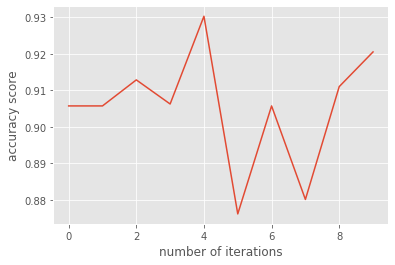

In [86]:
scores_binary = []
for i in range(10):
    sg.fit(X_train, y_train)
    scores_binary.append(sg.score(X_train, y_train))

plt.plot(range(10), scores_binary) 
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')

Text(0, 0.5, 'accuracy score')

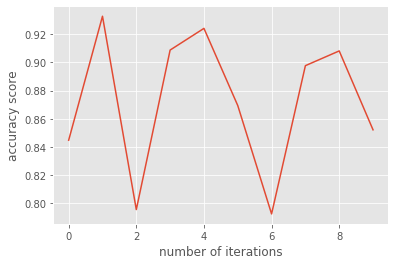

In [87]:
scores_PClass = []
for i in range(10):
    sg.fit(X_test,y_test)
    scores_PClass.append(sg.score(X_test,y_test))

plt.plot(range(10), scores_PClass)
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')